# Devanagiri Handwritten Character Recognition using CNN
## Tensorflow version
### Train Accuracy: 99%
### Test Accuracy: 91%

## Imports

In [146]:
import pandas as pd
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np
import cv2
import matplotlib.pyplot as plt

## Data Preparation

Copy data into new directory according to labels

In [91]:
import os
v = os.listdir("./nhcd/consonants/")
for i in v:
    os.system(f"cp -r ./nhcd/consonants/{i} ./nhcd/data/{int(i)+21}")

Renaming files

In [ ]:
path = "./nhcd/data/"
list_ = os.listdir(path)
os.chdir(path)
for di in list_:
    os.chdir(f"./{di}")
    i = 0
    l_ = os.listdir(f"./")
    for sub in l_:
        os.rename(sub,f"{di}_{i}")
        i+=1
    os.chdir("..")
        

In [134]:
list_ = os.listdir('./nhcd/data')

In [138]:
for i in list_:
    pa = f'./nhcd/data/{i}'
    for j in os.listdir(pa):
        shutil.copy(f"{pa}/{j}","./nhcd/d")

Generating dataset


In [171]:
imgs_ = []
labels_ = []
files_ = os.listdir('./nhcd/data')
for i in files_:
    img = cv2.imread(f"./nhcd/data/{i}",0)
    label = i.split("_")[0]
    imgs_.append(img)
    labels_.append(int(label))
    

In [172]:
len(labels_) == len(imgs_)

True

Creating dataframe

In [173]:
df = pd.DataFrame()
df['X'] = imgs_
df['y'] = labels_

In [174]:
df.head()

,X,y
0,"[[253, 250, 250, 255, 255, 248, 252, 246, 243,...",0
1,"[[253, 255, 252, 241, 255, 255, 247, 251, 255,...",0
2,"[[239, 255, 245, 255, 255, 248, 255, 249, 242,...",0
3,"[[255, 251, 243, 255, 238, 241, 251, 120, 59, ...",0
4,"[[243, 255, 239, 255, 254, 236, 230, 155, 82, ...",0


## EDA

0

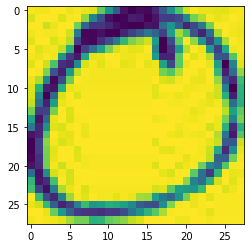

In [175]:
plt.imshow(imgs_[0])
labels_[0]

In [176]:
imgs_[0].shape

(28, 28)

## Data spliting

In [ ]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.2)
Xtrain = tf.convert_to_tensor(list(train['X']))
ytrain = tf.convert_to_tensor(list(train['y']))
Xtest = tf.convert_to_tensor(list(test['X']))
ytest = tf.convert_to_tensor(list(test['y']))

## Model building

In [212]:
model = tf.keras.Sequential([
                tf.keras.layers.Conv2D(32, (3,3), padding='same', activation=tf.nn.relu, input_shape=(28,28,1)),
                tf.keras.layers.MaxPooling2D((2,2), strides=2),
                tf.keras.layers.Conv2D(64, (3,3), padding='same', activation=tf.nn.relu),
                tf.keras.layers.MaxPooling2D((2,2),strides=2),
                tf.keras.layers.Conv2D(128, (3,3), padding='same', activation=tf.nn.relu),
                tf.keras.layers.MaxPooling2D((2,2),strides=2),
                tf.keras.layers.Flatten(),
                tf.keras.layers.Dense(512, activation=tf.nn.relu),
                tf.keras.layers.Dense(256, activation=tf.nn.relu),
                tf.keras.layers.Dense(58, activation=tf.nn.softmax)
])

In [213]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['Accuracy'])

## Training

In [214]:
model.fit(Xtrain, ytrain, epochs=30,batch_size = 128)

Epoch 1/30
81/81 [==============================] - 6s 69ms/step - loss: 7.3169 - Accuracy: 0.1416
Epoch 2/30
81/81 [==============================] - 6s 70ms/step - loss: 1.3624 - Accuracy: 0.6082
Epoch 3/30
81/81 [==============================] - 6s 73ms/step - loss: 0.6560 - Accuracy: 0.8028
Epoch 4/30
81/81 [==============================] - 6s 71ms/step - loss: 0.4023 - Accuracy: 0.8738
Epoch 5/30
81/81 [==============================] - 6s 71ms/step - loss: 0.2682 - Accuracy: 0.9161
Epoch 6/30
81/81 [==============================] - 6s 69ms/step - loss: 0.1811 - Accuracy: 0.9417
Epoch 7/30
81/81 [==============================] - 7s 85ms/step - loss: 0.1065 - Accuracy: 0.9649
Epoch 8/30
81/81 [==============================] - 6s 71ms/step - loss: 0.0698 - Accuracy: 0.9784
Epoch 9/30
81/81 [==============================] - 6s 71ms/step - loss: 0.0373 - Accuracy: 0.9898
Epoch 10/30
81/81 [==============================] - 6s 72ms/step - loss: 0.0284 - Accuracy: 0.9924
Epoch 11/

In [215]:
test_loss, test_accuracy = model.evaluate(Xtest,ytest)
print(f'Accuracy on test dataset: {test_accuracy}')

81/81 [==============================] - 1s 6ms/step - loss: 0.4999 - Accuracy: 0.9141
Accuracy on test dataset: 0.9140534400939941


## Prediction

In [216]:
predictions = model.predict(Xtest)

81/81 [==============================] - 1s 6ms/step


## Testing

In [217]:
def test(n):
    plt.imshow(Xtest[n], cmap='gray')
    plt.title("Input image")
    plt.xticks([])
    plt.yticks([])
    plt.show()
    print("Ground truth class:",end="")
    tf.print(ytest[n])
    print(f"Predicted class: {np.argmax(predictions[n])}")
    

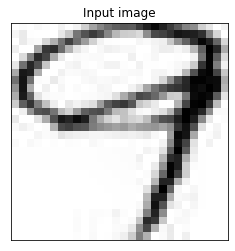

Ground truth class:1
Predicted class: 1


In [218]:
test(6)